In [1]:
pip install emoji

     |████████████████████████████████| 170 kB 8.8 MB/s 
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169314 sha256=e834b7af6c08e0a9e96961b50b82401949714dfa5a2eb631d26fc36f6366cb87
  Stored in directory: /root/.cache/pip/wheels/ea/5f/d3/03d313ddb3c2a1a427bb4690f1621eea60fe6f2a30cc95940f
Successfully built emoji


In [2]:
import regex
import pandas as pd
import numpy as np
import emoji
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
def date_time(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
    result = regex.match(pattern, s)
    if result:
        return True
    return False

def find_author(s):
    s = s.split(":")
    if len(s)==2:
        return True
    else:
        return False

def getDatapoint(line):
    splitline = line.split(' - ')
    dateTime = splitline[0]
    date, time = dateTime.split(", ")
    message = " ".join(splitline[1:])
    if find_author(message):
        splitmessage = message.split(": ")
        author = splitmessage[0]
        message = " ".join(splitmessage[1:])
    else:
        author= None
    return date, time, author, message

In [5]:
data = []
conversation = '/content/drive/MyDrive/WhatsApp Chat with Data Science _ Bagcampus.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer = []
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        if date_time(line):
            if len(messageBuffer) > 0:
                data.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDatapoint(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)

In [7]:
df = pd.DataFrame(data, columns=["Date", 'Time', 'Author', 'Message'])
df['Date'] = pd.to_datetime(df['Date'])
df.tail()
df.info()
df.Author.unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     49 non-null     datetime64[ns]
 1   Time     49 non-null     object        
 2   Author   43 non-null     object        
 3   Message  49 non-null     object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.7+ KB


array(['+91 94031 79389 created group "Data Science ', None,
       '+91 94218 21376', 'Rajat Mongia', '+91 99757 07788', 'Ria',
       '+91 83905 14355', '+91 94031 79389'], dtype=object)

In [8]:
total_messages = df.shape[0]
print(total_messages)

49


In [9]:
media_messages = df[df["Message"]=='<Media omitted>'].shape[0]
print(media_messages)

0


In [21]:
def split_count(text):
    emoji_list = []
    data = regex.findall(r'\X',text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI_ENGLISH for char in word):
            emoji_list.append(word)
    return emoji_list
df['emoji'] = df["Message"].apply(split_count)

emojis = sum(df['emoji'].str.len())
print(emojis)

22


In [22]:
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: regex.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)

print("Total Messages: ", total_messages)
print("Number of Media Shared: ", media_messages)
print("Number of Emojis Shared", emojis)
print("Number of Links Shared", links)

Total Messages:  49
Number of Media Shared:  0
Number of Emojis Shared 22
Number of Links Shared 15


In [23]:
media_messages_df = df[df['Message'] == '<Media omitted>']
messages_df = df.drop(media_messages_df.index)
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

l = ['+91 94218 21376', 'Rajat Mongia', '+91 99757 07788', 'Ria',
       '+91 83905 14355', '+91 94031 79389']
for i in range(len(l)):
  # Filtering out messages of particular user
  req_df= messages_df[messages_df["Author"] == l[i]]
  # req_df will contain messages of only one particular user
  print(f'Stats of {l[i]} -')
  # shape will print number of rows which indirectly means the number of messages
  print('Messages Sent', req_df.shape[0])
  #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  print('Average Words per message', words_per_message)
  #media conists of media messages
  media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
  print('Media Messages Sent', media)
  # emojis conists of total emojis
  emojis = sum(req_df['emoji'].str.len())
  print('Emojis Sent', emojis)
  #links consist of total links
  links = sum(req_df["urlcount"])   
  print('Links Sent', links)
  print('\n')

Stats of +91 94218 21376 -
Messages Sent 13
Average Words per message 13.307692307692308
Media Messages Sent 0
Emojis Sent 4
Links Sent 11


Stats of Rajat Mongia -
Messages Sent 7
Average Words per message 3.2857142857142856
Media Messages Sent 0
Emojis Sent 3
Links Sent 0


Stats of +91 99757 07788 -
Messages Sent 4
Average Words per message 5.0
Media Messages Sent 0
Emojis Sent 4
Links Sent 0


Stats of Ria -
Messages Sent 3
Average Words per message 1.6666666666666667
Media Messages Sent 0
Emojis Sent 4
Links Sent 0


Stats of +91 83905 14355 -
Messages Sent 6
Average Words per message 3.0
Media Messages Sent 0
Emojis Sent 5
Links Sent 0


Stats of +91 94031 79389 -
Messages Sent 9
Average Words per message 25.22222222222222
Media Messages Sent 0
Emojis Sent 2
Links Sent 2




In [24]:
total_emojis_list = list(set([a for b in messages_df.emoji for a in b]))
total_emojis = len(total_emojis_list)

total_emojis_list = list([a for b in messages_df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
for i in emoji_dict:
  print(i)
  
emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
import plotly.express as px
fig = px.pie(emoji_df, values='count', names='emoji')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

('👍', 14)
('\U0001fa94', 3)
('👍🏻', 2)
('✨', 1)
('🎆', 1)
('😅', 1)


There are 3927 words in all the messages.


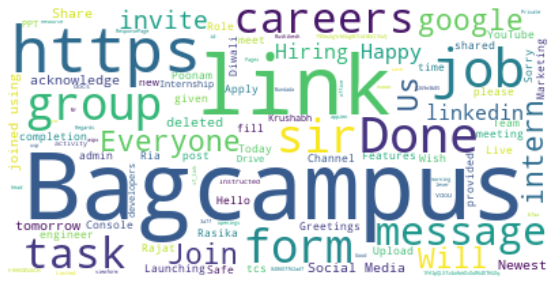

In [25]:
text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Author name +91 94218 21376


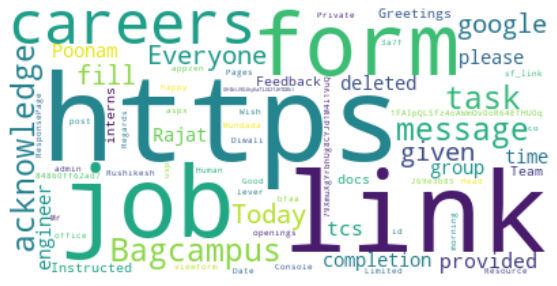

Author name Rajat Mongia


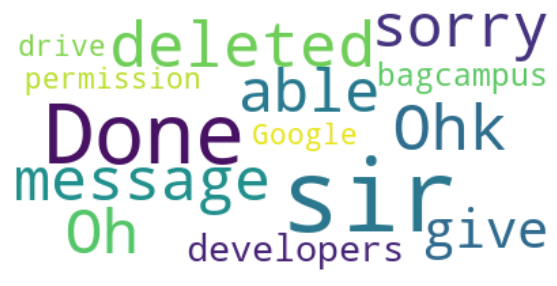

Author name +91 99757 07788


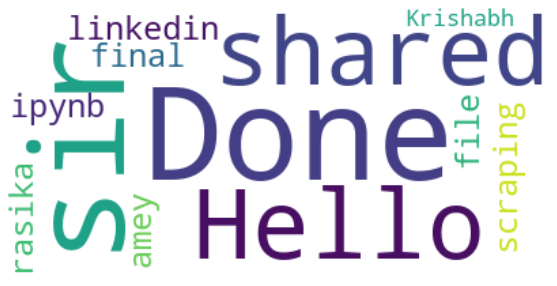

Author name Ria


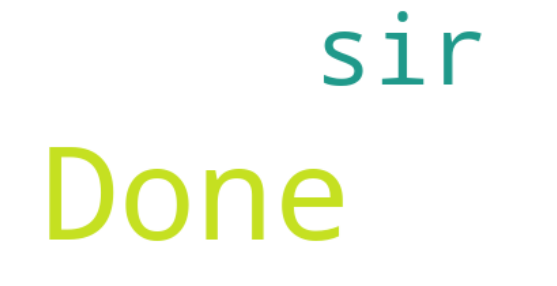

Author name +91 83905 14355


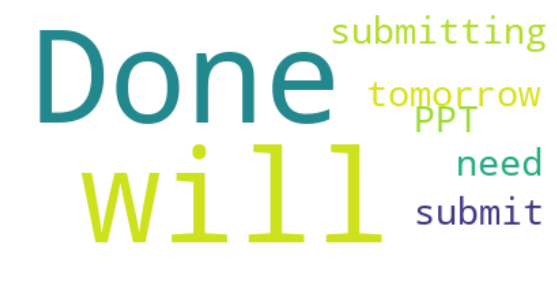

Author name +91 94031 79389


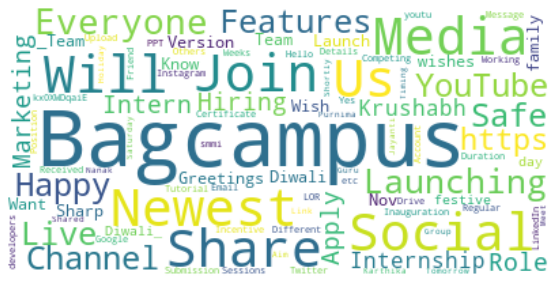

In [26]:
l = ['+91 94218 21376', 'Rajat Mongia', '+91 99757 07788', 'Ria',
       '+91 83905 14355', '+91 94031 79389']
for i in range(len(l)):
  dummy_df = messages_df[messages_df['Author'] == l[i]]
  text = " ".join(review for review in dummy_df.Message)
  stopwords = set(STOPWORDS)
  #Generate a word cloud image
  print('Author name',l[i])
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  #Display the generated image   
  plt.figure( figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()